In [1]:
import numpy as np
from keras.callbacks import EarlyStopping
from keras.models import Sequential,load_model
from keras.layers import Dense,Dropout, Conv2D, MaxPooling2D,Flatten,Softmax,Activation
from keras.optimizers import SGD, Adam, RMSprop,Nadam, Adadelta
#from keras.utils import np_utils
import scipy.misc
import glob, random
import os
from keras import backend as K


%matplotlib inline 
from skimage.io import imshow, imread, imsave 
os.chdir("C:/Users/ПОЛЬЗОВАТЕЛЬ/Desktop")

Using TensorFlow backend.


In [2]:
Batches = 20
num_epochs = 1
N=40


In [3]:
#def clean():
#    path = glob.glob("Выборк/(*) *.jpg")
#    for i in path:
#        os.remove(i)

def Val():
    n=0
    path = glob.glob("Выборка-Val/(*) *.jpg")
    print(len(path))
    valid_in=[]
    valid_out=[]
    for i in path:
        imge= imread(i)
        tabe = np.array(imge)/255
        valid_in.append(tabe)
        if int(i[-5]) == 1:
            valid_out.append((1,0))
        else:
            valid_out.append((0,1))
        n+=1  
    return [valid_in,valid_out]
        
def reform(in_):
    return np.array(in_)

        
def shuffles():
        n=0
        path = glob.glob("Выборка\(*) 1.jpg")
        print("Один - ",len(path))
        random.shuffle(path)
        out=[]
        out.append(path[:450])
        #for i in path:
        #    imge= imread(i)
        #    n+=1
        #    imsave("Выборка/({}) 1.jpg".format(n),imge)

        path = glob.glob("Выборка\(*) 0.jpg")
        print("Много - ",len(path))
        random.shuffle(path)
        out.append(path[:450])
        #for i in path:
        #    imge= imread(i)
        #    n+=1
        #    imsave("Выборка/({}) 0.jpg".format(n),imge)
        return out      
        
def load(path):
    test_in = []
    test_out = []
    for i in path[0]:
        test_out.append((1,0))
        img = imread(i)
        tabe = np.array(img)/255
        test_in.append(tabe)
    for i in path[1]:
        test_out.append((0,1))
        img = imread(i)
        tabe = np.array(img)/255
        test_in.append(tabe)    
    
    return ([test_in,test_out])
        
def sborka():
    path=shuffles()
    Load = load(path)
    Load1 = np.zeros((len(Load[0]),400,400,3))
    Load2 = []
    for i in range(len(Load[0])):
        Load1[i] = reform(Load[0][0])
        Load2.append(Load[1][0])
        del(Load[0][0],Load[1][0])
    Load2 = np.array(Load2)
    return ([Load1,Load2])

def Load_Net(path):
    Net = load_model(path)
    Net.compile(loss = "logcosh",optimizer=Adadelta(),metrics=['accuracy'])
    return(Net)
    
    

In [5]:
Valid = Val()

31


In [6]:
Valid1 = np.zeros((len(Valid[0]),400,400,3))
for i in range(len(Valid[0])):
    Valid1[i]=reform(Valid[0][i])
    Valid[0][i]=0
Valid = np.array(Valid[1])


[1 0]


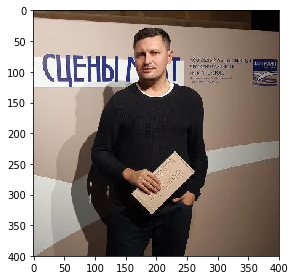

In [7]:
i =9
imshow(Valid1[i])
print(Valid[i])

In [9]:
clean()

In [8]:
path = shuffles()
Load = load(path)
del(path)
Load1 = np.zeros((len(Load[0]),800,800,3))
for i in range(len(Load[0])):
    Load1[i]=reform(Load[0][i])
    Load[0][i]=0
Load = np.array(Load[1])


С людьми -  311
Без людей -  129


1


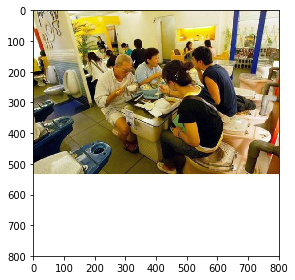

In [11]:
imshow(Load1[10])
print(Load[10])

In [8]:
print("Сеть получит {} выборок обучения ".format(N))
Min_Loss = float(input("Пороговое значение ошибки - "))
for i in range(N):    
    print("Выборка № ",i+1)
    Load = sborka()
    Net = Load_Net("Од.мн.h5") 
    Net.fit(Load[0], 
            Load[1],
            batch_size = Batches, 
            epochs = num_epochs,
            validation_data = (Valid1,Valid)
           )
    accuracy = Net.evaluate(Valid1,Valid)[0]
    if accuracy < Min_Loss:
            print("Ошибка валидационной выборки - {}, что меньше чем наилучший показатель - {}".format(accuracy,Min_Loss))
            Min_Loss=accuracy
            Net.save('Од.мн_loss({}).h5'.format(round(accuracy,4)))
    Net.save('Од.мн.h5')
    del (Load,Net)#,accuracy)

Сеть получит 40 выборок обучения 
Минимальная ошибка - 0.1
Выборка №  1
Один -  678
Много -  488
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 700 samples, validate on 31 samples
Epoch 1/5
700/700 [==============================] - 59s 85ms/step - loss: 0.1255 - acc: 0.4900 - val_loss: 0.1202 - val_acc: 0.5806
Epoch 2/5
700/700 [==============================] - 58s 82ms/step - loss: 0.1211 - acc: 0.5043 - val_loss: 0.1199 - val_acc: 0.4839
Epoch 3/5
700/700 [==============================] - 58s 83ms/step - loss: 0.1182 - acc: 0.5600 - val_loss: 0.1186 - val_acc: 0.5806
Epoch 4/5
700/700 [==============================] - 58s 83ms/step - loss: 0.1203 - acc: 0.5186 - val_loss: 0.1189 - val_acc: 0.6129
Epoch 5/5
31/31 [==============================] - 1s 26ms/step
Выборка №  2
Один -  678
Мн

700/700 [==============================] - 58s 83ms/step - loss: 0.0465 - acc: 0.8629 - val_loss: 0.0818 - val_acc: 0.7742
Epoch 5/5
31/31 [==============================] - 1s 23ms/step
Ошибка валидационной выборки - 0.06396621465682983, что меньше чем наилучший показатель - 0.06944672763347626
Выборка №  20
Один -  678
Много -  488
Train on 700 samples, validate on 31 samples
Epoch 1/5
700/700 [==============================] - 63s 89ms/step - loss: 0.0560 - acc: 0.8371 - val_loss: 0.0727 - val_acc: 0.8065
Epoch 2/5
700/700 [==============================] - 65s 92ms/step - loss: 0.0531 - acc: 0.8500 - val_loss: 0.0717 - val_acc: 0.8065
Epoch 3/5
700/700 [==============================] - 58s 83ms/step - loss: 0.0479 - acc: 0.8729 - val_loss: 0.0752 - val_acc: 0.8065
Epoch 4/5
700/700 [==============================] - 59s 84ms/step - loss: 0.0483 - acc: 0.8500 - val_loss: 0.0782 - val_acc: 0.7419
Epoch 5/5
31/31 [==============================] - 1s 24ms/step
Выборка №  21
Один -  6

KeyboardInterrupt: 

In [4]:
Net = load_model('Люди_Loss(1).h5')
#Net.save('Люди_Loss(10.0).h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [5]:
shuffles()
path = glob.glob("Выборка/(*) *.jpg")
random.shuffle(path)
path = path[:100]

C текстом -  132
В здании -  318
Не в здании -  239
Днём -  54
Ночью -  53
С людьми -  311
Без людей -  246
Селфи -  96
Не селфи -  461
Один -  203
Не один -  108


In [5]:
test_in = []
test_out = []

In [6]:
test_in = []
test_out = []
for i in path:
    test_out.append(list(i[-12:-4]))
    img = imread(i)
    tabe = np.array(img)/255
    test_in.append(tabe)
test_in = np.array(test_in)
test_out = np.array(test_out)

['0' '0' '1' '0' '1' '1' '1' '0']


(100, 8)

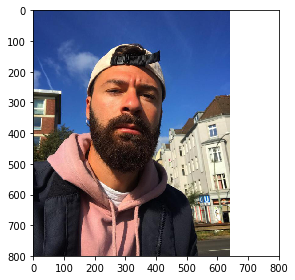

In [7]:
imshow(test_in[80])
print(test_out[80])
test_out.shape


In [47]:
input_shape = (400,400,3)
Net = Sequential()
Net.add(Conv2D(5,input_shape = input_shape,kernel_size = (3,3),activation = K.relu))
Net.add(MaxPooling2D(pool_size = (3,3)))
Net.add(Conv2D(10,kernel_size = (3,3),activation = K.relu))
Net.add(MaxPooling2D(pool_size = (3,3)))
Net.add(Conv2D(15,kernel_size = (3,3),activation = K.relu))
Net.add(MaxPooling2D(pool_size = (3,3)))
Net.add(Conv2D(30,kernel_size = (3,3),activation = K.relu))
Net.add(MaxPooling2D(pool_size = (3,3)))
Net.add(Dropout(0.5))
Net.add(Flatten())
Net.add(Dense(50,activation = K.relu))
Net.add(Dropout(0.5))
Net.add(Dense(50,activation = K.relu))
Net.add(Dropout(0.5))
Net.add(Dense(50,activation = K.relu))
Net.add(Dropout(0.5))
Net.add(Dense(2,activation = K.softmax))
Net.save('Од.мн.h5')
del(Net)

In [5]:
Net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 398, 398, 10)      280       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 10)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 10)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 10)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                4025      
__________

In [16]:
Net.compile(loss = "binary_crossentropy",optimizer=Adam(),metrics=['accuracy'])

In [3]:
Net = load_model('1.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [6]:
Load = sborka()

Один -  802
Много -  700


In [8]:
del(Load)

In [7]:
Train_1 = Net.fit(Load[0], Load[1], batch_size = Batches, epochs = num_epochs)

Epoch 1/1
900/900 [==============================] - 86s 96ms/step - loss: 0.1261 - acc: 0.4889


input_shape = (800,800,3)
Net = Sequential()
Net.add(Conv2D(8,kernel_size = (2,2),activation = 'relu', input_shape=input_shape))
Net.add(MaxPooling2D(pool_size = (3,3)))
Net.add(Conv2D(15,kernel_size = (3,3),activation = 'relu'))
Net.add(Conv2D(15,kernel_size = (3,3),activation = 'relu'))
Net.add(MaxPooling2D(pool_size = (3,3)))
Net.add(Conv2D(15,kernel_size = (4,4),activation = 'relu'))
Net.add(Conv2D(20,kernel_size = (4,4),activation = 'relu'))
Net.add(MaxPooling2D(pool_size = (4,4)))
Net.add(Flatten())
Net.add(Dense(100,activation = 'relu'))
Net.add(Dropout(0.3))
Net.add(Dense(80,activation = 'relu'))
Net.add(Dropout(0.3))
Net.add(Dense(50,activation = 'relu'))
Net.add(Dropout(0.3))
Net.add(Dense(8,activation = 'relu'))
Net.add(Softmax())

In [7]:
Net=load_model('Люди_Loss(2).h5')
#del (Net)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


[[1. 0.]]


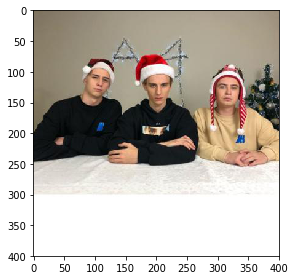

In [43]:
im = imread("Выборка-Val/(1) 1.jpg")
imshow(im)
im = im.reshape(1,400,400,3)
Net.predict(im)
print(Net.predict(im))


In [45]:
for i in Valid1:
    a = Net.predict(i.reshape(1,400,400,3))[0]
    #print(a)
print('——————————')
#print(Valid)


——————————
[[1. 0.]]


array([[0.05542486, 0.9445751 ]], dtype=float32)

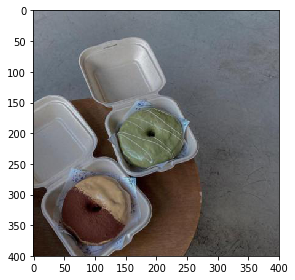

In [58]:
imshow(imread("Выборка-Val/(12) 0.jpg"))
im = np.array(imread("Выборка-Val/(12) 0.jpg"))/255
im = im.reshape(1,400,400,3)
Net.predict(im)

In [24]:
i = 10
imshow(Valid1[i])
Net.predict(Valid1[i].reshape(1,400,400,3))

IndexError: index 10 is out of bounds for axis 0 with size 9